# k-Nearest Neighbors (kNN) from Scratch

k-Nearest Neighbors is a non-parametric classification method that classifies a sample based on the labels of its $k$ closest points in the training data. It works by measuring distances (e.g., Euclidean) and letting the $k$ closest points decide the predicted class.

Pros: simple, no training needed, works with nonlinear boundaries

Cons: slow for large datasets, sensitive to noise and feature scaling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
np.random.seed(0)

# Class 0: centered around (2, 2)
X0 = np.random.randn(50, 2) + np.array([2, 2])
y0 = np.zeros(50)

# Class 1: centered around (4, 4)
X1 = np.random.randn(50, 2) + np.array([4, 4])
y1 = np.ones(50)

# Combine them
X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

# test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

The implementation:

In [9]:
def knn_predict(X_train, y_train, X, k=5):
        
        preds = []
        for x in X:
            # list of distances of test point x to all train points
            distances = np.linalg.norm(X_train - x, ord=2, axis=1)

            # get the labels of the k nearest neighbors
            k_indices = np.argsort(distances)[:k]
            k_nearest_labels = y_train[k_indices]

            # get the most common label among the nearest neighbors
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]

            preds.append(most_common)
            
        return np.array(preds)

Let's try different values for k:

In [24]:
ks = [1, 2, 3, 5]
for k in ks:
    y_pred = knn_predict(X_train, y_train, X_test, k=k)

    accuracy = accuracy_score(y_pred, y_test)

    print(f"k={k}", "accuracy:", accuracy)

k=1 accuracy: 0.85
k=2 accuracy: 0.85
k=3 accuracy: 1.0
k=5 accuracy: 1.0


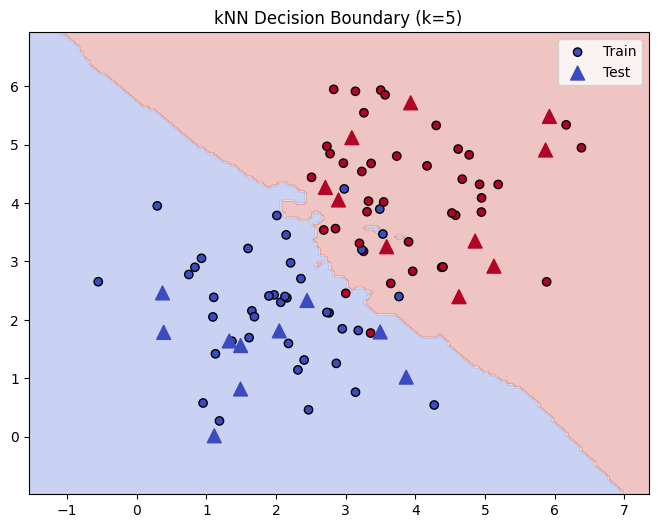

In [28]:
# Visualize decision boundary (like in logistic regression)
h = 0.05  # grid step size
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn_predict(X_train, y_train, grid_points, k=5)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, marker='^', s=100, label='Test')
plt.title(f"kNN Decision Boundary (k={5})")
plt.legend()
plt.show()


It's usually more robust against noise with higher values for $k$

Here's how to implement it in sklearn:

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)

print(accuracy)

0.85
